# 선형대수

# 데이터와 행렬
```

스칼라 : 숫자 하나만으로 이루어진 데이터
벡터 : 여러 숫자가 특정한 순서대로 모여 있는 것을 의미. 하나의 벡터를 이루는 데이터 수가 n개이면 n-차원 벡터라고 함
열벡터는 열의 수가 1인 행렬
하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열로 나타내고 복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행으로 표기하는 것은 데이터 분석에서 일반적인 관례
스칼라와 벡터도 수학적으로는 행렬에 속한다.
스칼라는 열과 행의 수가 각각 1인 행렬이고 벡터는 열의 수가 1인 행렬이다.

Python Numpy 선형대수
단위행렬 (Unit matrix): np.eye(n)
대각행렬 (Diagonal matrix): np.diag(x)
내적 (Dot product, Inner product): np.dot(a, b)
대각합 (Trace): np.trace(x)
행렬식 (Matrix Determinant): np.linalg.det(x)
역행렬 (Inverse of a matrix): np.linalg.inv(x)
고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)
특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A)
```
https://rfriend.tistory.com/380

In [1]:
import numpy as np
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

벡터 a를 벡터 b와 같은 방향의 성분과 그렇지 않은 성분으로 분해한다고 할 때 의 길이는 벡터 b와 같은 방향의 성분 길이와 같다.

벡터 a와 b의 내적은 벡터 b의 길이와 벡터 a에서 벡터 b와 같은 방향의 성분 길이를 곱한 것이다.

- 행렬 내적은 행렬 곱이며 두 행렬 A와 B의 내적은 np.dot()을 이용해 계산이 가능
- 행렬 내적의 특성으로 왼쪽 행렬의 열개수와 오른쪽 행렬의 행개수가 동일해야 내적 연산 가능

In [3]:
# 내적
a = np.arange(1,5).reshape(2,2)
a

array([[1, 2],
       [3, 4]])

In [4]:
np.dot(a,a)

array([[ 7, 10],
       [15, 22]])

In [7]:
x = np.arange(1,7).reshape(2,3)
y = np.array([[6.,23],[-1,7],[8,9]])
print(x)
print(y)

[[1 2 3]
 [4 5 6]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


In [9]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

행렬 곱을 응용하여 신경망에 적용
<img src='./행렬곱.jpg' size=10>

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
print(digits.images[0].shape)

(8, 8)


In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

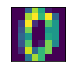

In [3]:
plt.figure(figsize=(1,1))
plt.imshow(digits.images[0])
plt.grid(False);plt.xticks([]);plt.yticks([])
plt.show()

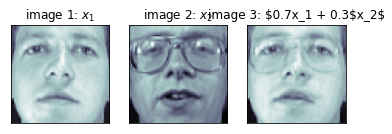

In [7]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f,ax = plt.subplots(1,3)

ax[0].imshow(faces.images[6],cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10],cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face,cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3$x_2$")

plt.show()

In [9]:
import numpy as np
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
C1 = A@B
C2 = np.dot(A,B)
print(C1,'\n')
print(C2)

[[22 28]
 [49 64]] 

[[22 28]
 [49 64]]


In [10]:
display(C1,C2)

array([[22, 28],
       [49, 64]])

array([[22, 28],
       [49, 64]])

In [11]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
C = np.array([[9,8],[7,6]])

In [12]:
# 교환 법칙 성립하지 않음
C1 = A@B
C2 = B@A
display(C1,C2)

array([[19, 22],
       [43, 50]])

array([[23, 34],
       [31, 46]])

In [14]:
# 분배 법칙은 성립
D1 = A@(B+C)
D2 = A@B+A@C
display(D1,D2)

array([[42, 42],
       [98, 98]])

array([[42, 42],
       [98, 98]])

https://ratsgo.github.io/linear%20algebra/2017/05/21/determinants/
https://www.youtube.com/watch?v=fuVMiyahzH4


In [ ]:
import numpy as np
import numpy.linalg as LA

np.random.seed(4)
a = np.array(np.random.randint(0, 5, size=(5, 5)))
print(a)
LA.det(a)


선형 연립방정식
- 선형예측모형은 입력 데이터 벡터와 가중치 벡터의 내적으로 계산된 예측값이 실제 출력 데이터와 유사한 값을 출력하도록 하는 모형
- 연립방정식과 역행렬을 이용하여 선형 예측 모형의 가중치 벡터를 구할 수 있다.
역행렬
- 정방행렬에 대한 역행렬은 원래의 행렬과 다음 관계를 만족하는 정방행렬을 의미 $A^{-1}A = AA^{-1} = I$, I는 항등행렬


In [15]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size=(3,3))
mt1

array([[1, 2, 1],
       [2, 2, 3],
       [1, 3, 1]])

In [16]:
mt2 = np.linalg.inv(mt1)
mt2

array([[ 7., -1., -4.],
       [-1.,  0.,  1.],
       [-4.,  1.,  2.]])

In [17]:
np.dot(mt1,mt2)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
# Q. 아래 행렬의 역행렬을 구하고 검증하세요
arr = np.matrix([[1,3],[4,7]])
arr

matrix([[1, 3],
        [4, 7]])

### 함수

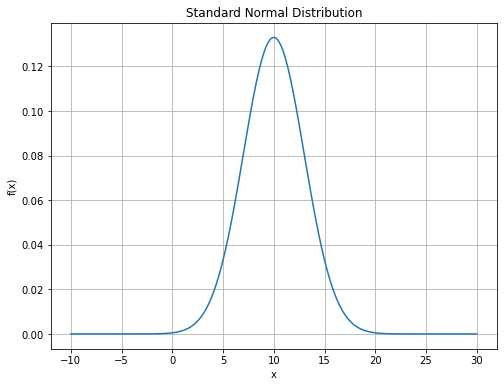

In [19]:
# Q. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import norm 

x = np.arange(-10, 30, 0.001) 
plt.figure(figsize=(8,6))
plt.title('Standard Normal Distribution') 
plt.xlabel('x') 
plt.ylabel('f(x)')
plt.grid()
plt.plot(x, norm.pdf(x, loc=10, scale=3))
plt.show()


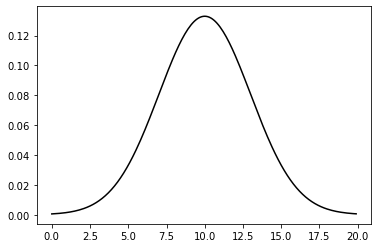

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

x_plot = np.arange(0,20,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=10,scale=3),color='black')

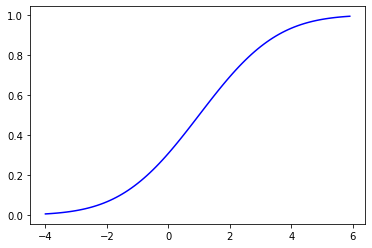

In [5]:
# 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현

x_plot = np.arange(-4,6,0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=1, scale=2), color='b')
plt.show()

역함수 : 어떤 함수의 입력/출력 관계와 정반대의 입출력 관계를 갖는 함수를 역함수라고 한다.
원래의 함수에서 x축과 y축이 바뀐 것이므로 y=x가 나타내는 직선(원점을 통과하는 기울기 1인 직선)을 대칭축으로 대칭인 함수의 그래프

Text(0.5, 1.0, '역함수의 그래프')

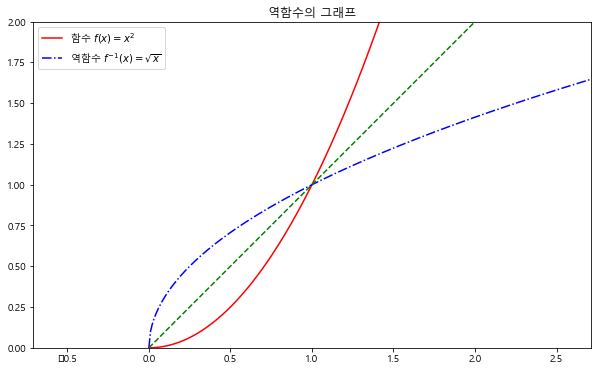

In [10]:
import warnings;warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc("font",family="Malgun Gothic")

def f1(x):
    return x**2

def flinv(x):
    return np.sqrt(x)

x = np.linspace(0,3,300)
plt.figure(figsize=(10,6))
plt.plot(x,f1(x),"r-",label="함수 $f(x)=x^2$")
plt.plot(x,flinv(x),"b-.",label="역함수 $f^{-1}(x)=\sqrt{x}$")
plt.plot(x,x,"g--")
plt.axis("equal")
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()
plt.title("역함수의 그래프")


In [12]:
def f(x):
    return (x**2+1)

def g(x):
    return np.sqrt(x-1)

In [13]:
xx1 = np.linspace(0.0,4.0,200)
xx2 = np.linspace(1.0,4.0,200)
yy1 = f(xx1)
yy2 = g(xx2)

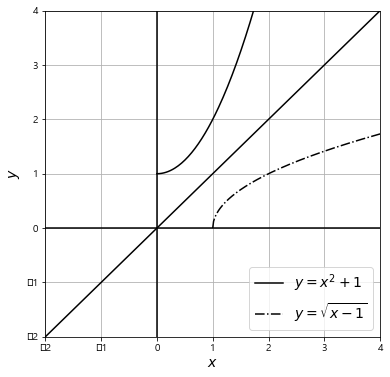

In [14]:
# 역함수의 그래프
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.figure(figsize=(6,6))
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$y$',fontsize=14)
plt.ylim(-2.0, 4.0)
plt.xlim(-2.0, 4.0)
plt.grid()
plt.plot(xx1,yy1, linestyle='-', c='k', label='$y=x^2+1$')
plt.plot(xx2,yy2, linestyle='-.', c='k', label='$y=\sqrt{x-1}$')
plt.plot([-2,4],[-2,4], color='black')
plt.plot([-2,4],[0,0], color='black')
plt.plot([0,0],[-2,4],color='black')
plt.legend(fontsize=14)

Text(0, 0.5, '$ReLU(x)$')

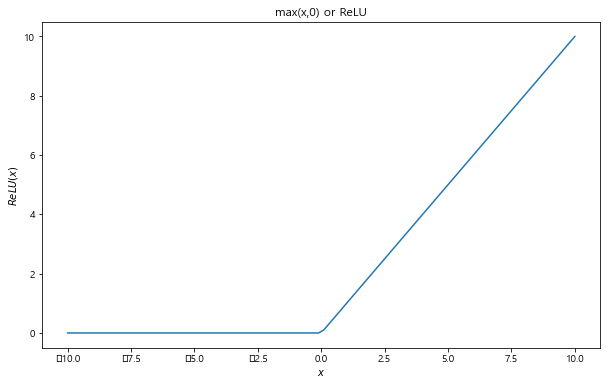

In [16]:
xx = np.linspace(-10,10,100)
plt.figure(figsize=(10,6))
plt.plot(xx,np.maximum(xx,0))
plt.title("max(x,0) or ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")

지수함수
- 정해진 어떤 값을 입력값으로 거듭제곱하여 출력을 구하는 함수
- 거듭 제곱을 할 때 아래에 있는 수를 밑이라고 하며 밑을 오일러 수 e(약 2.718)로 하여 거듭제곱하는 함수를 지수함수라고 한다.
- $y=e^x$, y=exp(x) = exp x 로 표시

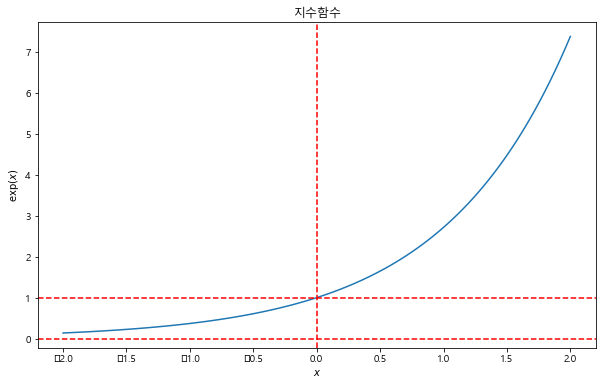

In [17]:
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)
plt.figure(figsize=(10,6))
plt.title("지수함수")
plt.plot(xx, yy)
plt.axhline(1, c='r', ls="--")
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\exp(x)$")
plt.show()

로그함수 : e를 거듭제곱하여 특정한 값이 되는 수를 찾을 필요가 있는데 e를 몇 제곱해야 10이라는 값이 될까? e를 2.3025851 거듭제곱하면 10이 된다. e를 거듭제곱하여 특정한 수 a가 되도록 하는 수를 log a라 표기하고 로그라고 읽는다.


Text(0, 0.5, '$\\log(x)$')

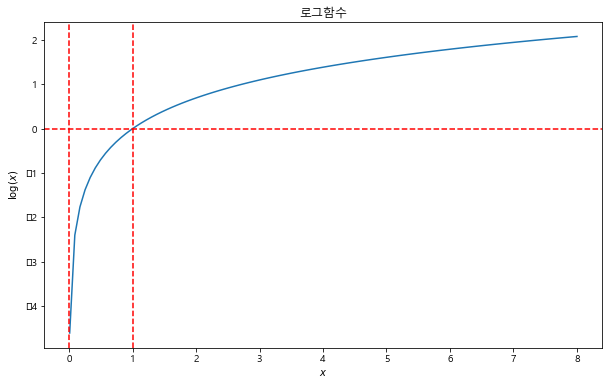

In [18]:
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)
plt.figure(figsize=(10,6))
plt.title("로그함수")
plt.plot(xx, yy)
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.axvline(1, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\log(x)$")

## 미분

최적화를 하기 위해서는 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지를 정량적으로 알아야 하며 이러한 과정이 미분이다.

함수의 그래프상에 있는 한 점을 줌심으로 그래프를 무한히 확대해 보면 그래프의 모양이 직선에 가까워지는데 이때의 기울기를 미분이라고 한다. 이 직선은 같은 점을 기준으로 그린 그래프의 접선과 같다.

신명망에서 미분의 필요성 : https://gggggeun.tistory.com/120           https://gggggeun.tistory.com/121

미분 개념 : https://www.youtube.com/watch?v=kMZ3RJEaLE4

Text(0, 0.5, '$\\sigma(x)$')

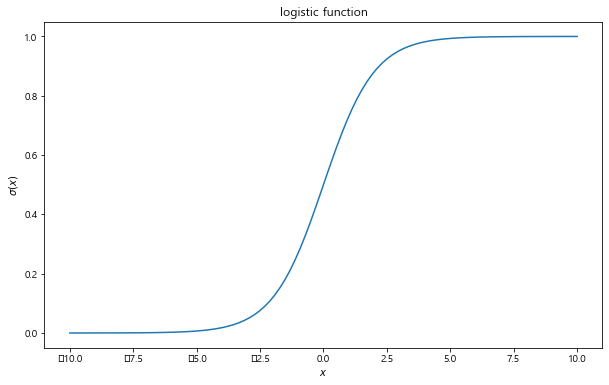

In [19]:
# 로지스틱 함수 : 지수함수를 변형한 함수로 시그모이드 함수의 하나이다.

def logistic(x):
    return 1/(1+np.exp(-x))

xx = np.linspace(-10,10,100)
plt.figure(figsize=(10,6))
plt.plot(xx, logistic(xx))
plt.title("logistic function")
plt.xlabel("$x$")
plt.ylabel("$\sigma(x)$")

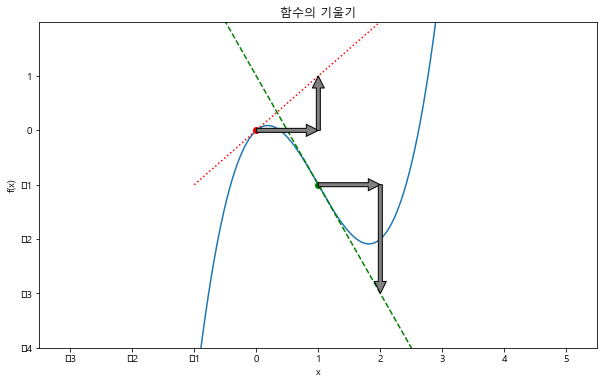

In [20]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()


Text(0.5, 1.0, 'delta = 0.0100')

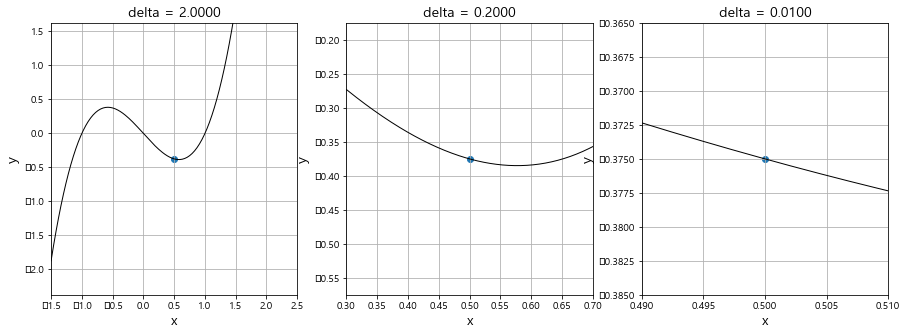

In [21]:
def f(x):
    return(x**3 - x)

plt.figure(figsize=(15, 5))
delta = [2.0, 0.2, 0.01]

x = np.linspace(0.5-delta[0], 0.5+delta[0], 200)
y = f(x)

plt.subplot(131)

plt.ylim(-3.0/8.0-delta[0], -3.0/8.0+delta[0])
plt.xlim(0.5-delta[0], 0.5+delta[0])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[0], fontsize=14)

x = np.linspace(0.5-delta[1], 0.5+delta[1], 200)
y = f(x)

plt.subplot(132)

plt.ylim(-3.0/8.0-delta[1], -3.0/8.0+delta[1])
plt.xlim(0.5-delta[1], 0.5+delta[1])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[1], fontsize=14)

x = np.linspace(0.5-delta[2], 0.5+delta[2], 200)
y = f(x)

plt.subplot(133)

plt.ylim(-3.0/8.0-delta[2], -3.0/8.0+delta[2])
plt.xlim(0.5-delta[2], 0.5+delta[2])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[2], fontsize=14)



In [28]:
x = np.linspace(-4,4,100)

ValueError: x and y must have same first dimension, but have shapes (100,) and (2,)

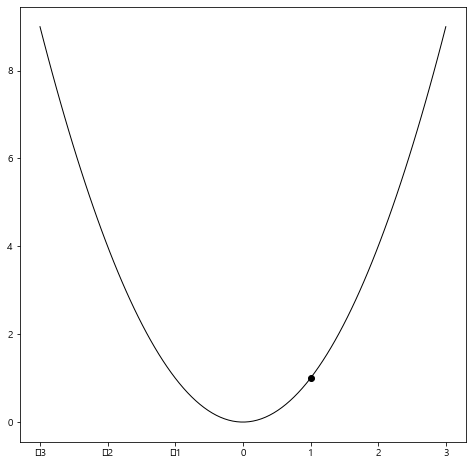

In [29]:
def f(x):
    return (x**2)
def g(x):
    return (2*x, -1)

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(8,8))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')

### 접선의 방정식

- 함수 f(x)에서 x의 값을 dx만큼 변화시켰을 때 f(x)의 변화량 (f(x+dx)-f(x))는 f'(x)dx와 같다.
- 미분 : y=f(x)라는 그래프상의 점(a,f(a))가 있을 때 그 점에서 그은 접선의 기울기는 f'(a)이며 a에서의 순간 변화율을 의미
- 적분 : 도함수 f'(x)의 하방 면적은 원 함수 f(x)의 y의 값이다. ex) f(x) = $x^2$
plt.tick_params(color='white')


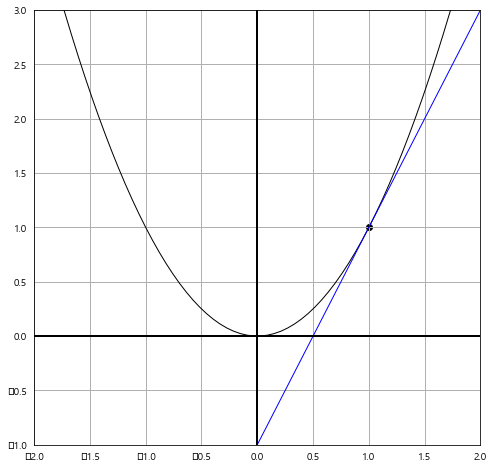

In [30]:
def f(x):
    return (x**2)
def g(x):
    return (2*x -1)

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(8,8))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')

In [31]:
! pip install sympy

     ---------------------------------------- 6.5/6.5 MB 10.9 MB/s eta 0:00:00
     -------------------------------------- 532.6/532.6 kB 6.7 MB/s eta 0:00:00
